In [ ]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def plot_data(data, year, title, xlabel, ylabel):
  """
    Args: 

    Return: 
  """
  plt.rcParams.update({'font.size': 16}) 
  dftmp = pd.DataFrame()
  dftmp["Ano"] = [x for x in year]
  dftmp["M"] = [data[x][1] for x in range(len(year))]
  dftmp["F"] = [data[x][0] for x in range(len(year))]
  dftmp.set_index("Ano", inplace=True)
  ax = dftmp.plot(kind="bar", rot=0)
  ax.plot([data[x][1] for x in range(len(year))])
  ax.plot([data[x][0] for x in range(len(year))])
  plt.title(title)
  plt.grid('True')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  x_offset = -0.05
  y_offset = 2.5
  for p in ax.patches:
      b = p.get_bbox()
      val = "{:.0f}".format(b.y1 + b.y0)
      ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
  fig = plt.gcf()
  fig.set_size_inches(10,6)
  return fig


def plot_pie(activities, data_phd, data_master, title):

  slices = [i+j for i,j in zip(data_master,data_phd)]
  colors = ['b', 'orange']
  plt.title(title) 
  plt.pie(slices, labels = activities, colors=colors,
          startangle=90, shadow = True, explode = (0.1, 0),
          radius = 1.2, autopct = '%1.1f%%')
  plt.legend()
  fig = plt.gcf()
  return fig


### BiLSTM 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


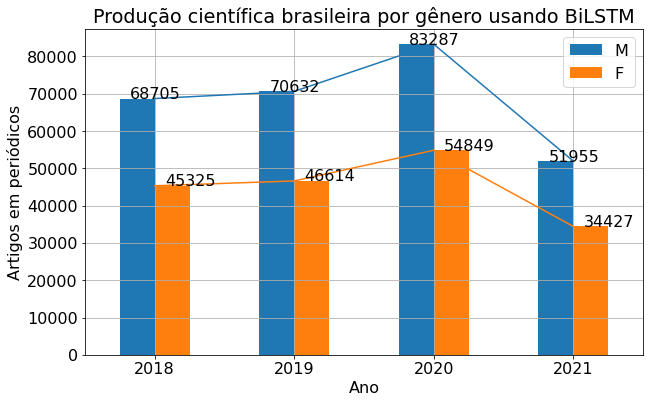

In [ ]:
master = {2018: [6033, 8962], 2019: [6780, 10086], 2020: [8397, 12136], 2021: [4921, 7479]}
phd = {2018: [39292, 59743], 2019: [39834, 60546], 2020: [46452, 71151], 2021: [29506, 44476]}
data = [[x[1][0]+ y[1][0], x[1][1]+ y[1][1]] for x,y in zip(master.items(),phd.items())]
year = [2018, 2019, 2020, 2021]

fig=plot_data(data=data,
          year=year, 
          title="Produção científica brasileira por gênero usando BiLSTM",
          xlabel='Ano',
          ylabel='Artigos em periódicos')
#plt.show()
fig.savefig('fig1.eps', format='eps', dpi=1200)

In [ ]:
male=[y for x,y in data]
mean_m = sum(male)/4
female = [x for x,y in data]
mean_f = sum(female)/4
male = np.array(male)
female = np.array(female)
diff = np.array([x-y for x,y in zip(male,female)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


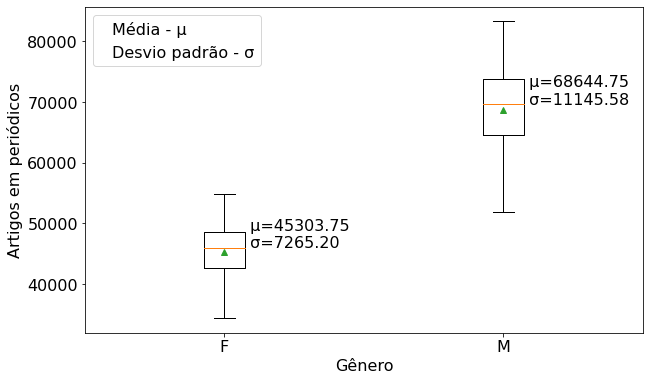

In [ ]:
female = [x for x,y in data]
male=[y for x,y in data]
plt.rcParams.update({'font.size': 16}) 
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['legend.numpoints'] = 1
m1 = [mean_f, mean_m]
st1 = [np.std(female), np.std(male)]
fig, ax = plt.subplots()
bp = plt.boxplot([female, male], labels=['F', 'M'], showmeans=True)#, widths=0.5)
fig = plt.gcf()
fig.set_size_inches(10,6)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    ax.annotate(text, xy=(x, y))
plt.xlabel('Gênero')
plt.ylabel('Artigos em periódicos')
plt.legend(['Média - μ', 'Desvio padrão - σ'])
plt.title('')
fig.savefig('fig5.eps', format='eps', dpi=1200)

### 1D-CNN

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


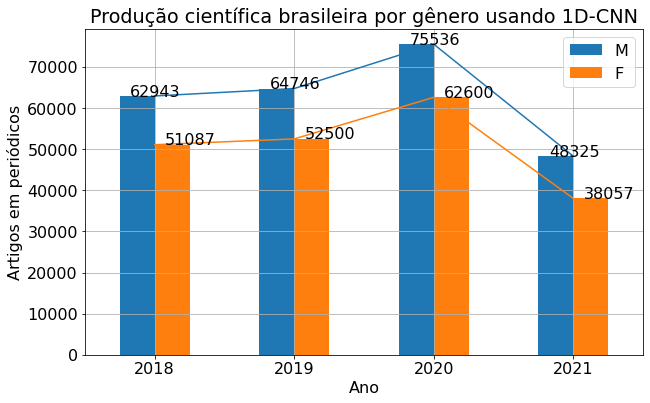

In [ ]:
master ={2018: [7173, 7822], 2019: [8063, 8803], 2020: [9711, 10822], 2021: [5702, 6698]}
phd = {2018: [43914, 55121], 2019: [44437, 55943], 2020: [52889, 64714], 2021: [32355, 41627]}
data = [[x[1][0]+ y[1][0], x[1][1]+ y[1][1]] for x,y in zip(master.items(),phd.items())]

fig2= plot_data(data=data,
          year=year, 
          title="Produção científica brasileira por gênero usando 1D-CNN",
          xlabel='Ano',
          ylabel='Artigos em periódicos')

fig2.savefig('fig2.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


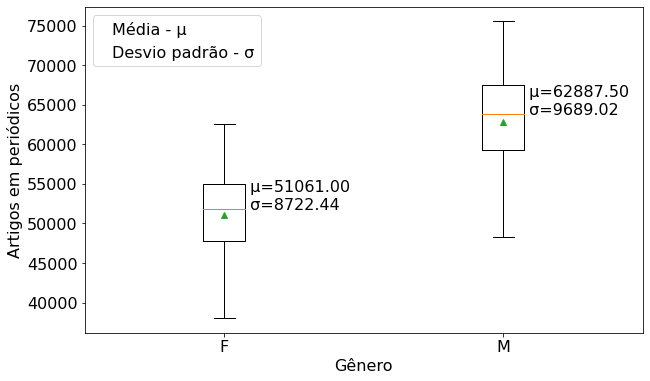

In [ ]:
male=[y for x,y in data]
mean_m = sum(male)/4
female = [x for x,y in data]
mean_f = sum(female)/4
plt.rcParams.update({'font.size': 16}) 
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['legend.numpoints'] = 1
m1 = [mean_f, mean_m]
st1 = [np.std(female), np.std(male)]
fig, ax = plt.subplots()
bp = plt.boxplot([female, male], labels=['F', 'M'], showmeans=True)#, widths=0.5)
fig = plt.gcf()
fig.set_size_inches(10,6)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    ax.annotate(text, xy=(x, y))
plt.xlabel('Gênero')
plt.ylabel('Artigos em periódicos')
plt.legend(['Média - μ', 'Desvio padrão - σ'])
fig.savefig('fig6.eps', format='eps', dpi=1200)

### SVM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


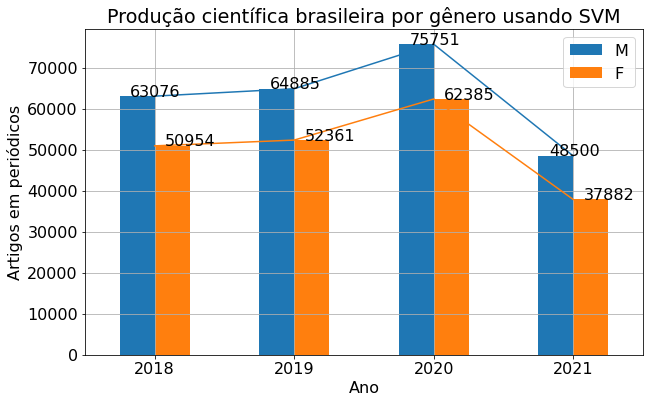

In [ ]:
master = {2018: [7136, 7859], 2019: [8067, 8799], 2020: [9733, 10800], 2021: [5710, 6690]}
phd = {2018: [43818, 55217], 2019: [44294, 56086], 2020: [52652, 64951], 2021: [32172, 41810]}
data = [[x[1][0]+ y[1][0], x[1][1]+ y[1][1]] for x,y in zip(master.items(),phd.items())]
year = [2018, 2019, 2020, 2021]

fig=plot_data(data=data,
          year=year, 
          title="Produção científica brasileira por gênero usando SVM",
          xlabel='Ano',
          ylabel='Artigos em periódicos')
#plt.show()
fig.savefig('fig10.eps', format='eps', dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


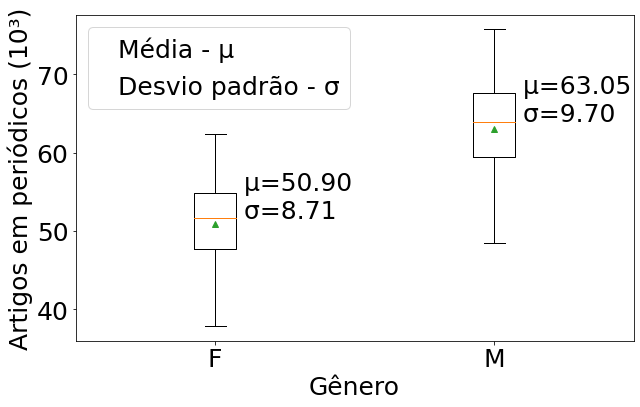

In [ ]:
male=[y/1000 for x,y in data]
mean_m = sum(male)/4
female = [x/1000 for x,y in data]
mean_f = sum(female)/4

plt.rcParams.update({'font.size': 25}) 
plt.rcParams['legend.handlelength'] = 0
plt.rcParams['legend.numpoints'] = 1
m1 = [mean_f, mean_m]
st1 = [np.std(female), np.std(male)]
fig, ax = plt.subplots()
bp = plt.boxplot([female, male], labels=['F', 'M'], showmeans=True)#, widths=0.5)
fig = plt.gcf()
fig.set_size_inches(10,6)
for i, line in enumerate(bp['medians']):
    x, y = line.get_xydata()[1]
    text = ' μ={:.2f}\n σ={:.2f}'.format(m1[i], st1[i])
    ax.annotate(text, xy=(x, y))
plt.xlabel('Gênero')
plt.ylabel('Artigos em periódicos (10³)')
plt.legend(['Média - μ', 'Desvio padrão - σ'])

fig.savefig('fig12.eps', format='eps', dpi=1200)


### CNN

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


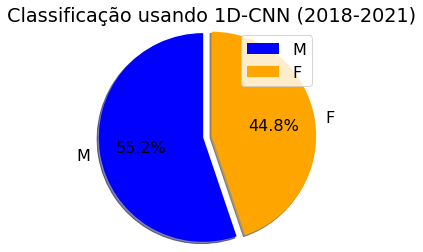

In [ ]:
activities = ['M', 'F']
data_master = [34145, 30649]
data_phd = [217405, 173595]
fig3 = plot_pie(activities, data_phd, data_master,
         title='Classificação usando 1D-CNN (2018-2021)')

fig3.savefig('fig3.eps', format='eps', dpi=1200)

### BiLSTM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


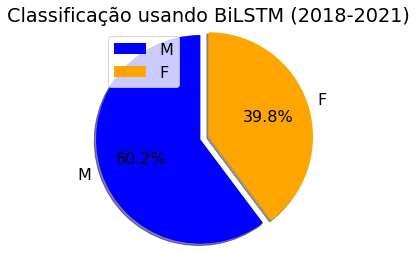

In [ ]:
data_master = [38663, 26131]
data_phd = [235916, 155084]
activities = ['M', 'F']

fig4= plot_pie(activities, data_phd, data_master,
         title='Classificação usando BiLSTM (2018-2021)')

fig4.savefig('fig4.eps', format='eps', dpi=1200)

### SVM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


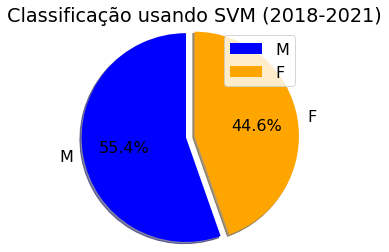

In [ ]:
activities = ['M', 'F']
data_master = [ 34536, 30258]
data_phd = [217871, 173129]
fig3 = plot_pie(activities, data_phd, data_master,
         title='Classificação usando SVM (2018-2021)')

fig3.savefig('fig13.eps', format='eps', dpi=1200)